In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt

import datetime

import math

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

TCLab = tclab.setup(connected= True) #False, speedup=100)

Specifications

In [2]:
spans = 11
base_unit = 60*30 #Each span lasts base_unit seconds

q_init = 0
q_final = 100

setpoint = 30

In [3]:
increment = (q_final-q_init)/(spans-1)

run_time = base_unit*spans

In [4]:
str(datetime.timedelta(seconds=run_time)), increment

('5:30:00', 10.0)

with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    q_test = q_init
    
    base_unit_checker = 1
    
    for t in tclab.clock(run_time):
        
        base_unit_counter = t/base_unit
        
        print(base_unit_counter, base_unit_checker, t)
        
        if base_unit_counter == base_unit_checker:
            
            base_unit_checker = base_unit_counter+1
            q_test += increment
        lab.Q1(q_test)
        tcplot.update(t)

h.get_sessions()

h.load_session(1)

data = {"Time" : h.t, "T1" : h.logdict['T1'], "T2" : h.logdict['T2'], "Q1" : h.logdict['Q1'], "Q2" : h.logdict['Q2']}

In [5]:
data_frame = pandas.read_csv("long_span_run 20200226 overnight")

In [38]:
class historian:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        self.t = self.dataframe.Time
    
    def logdict(self, string):
        return self.dataframe[string]

In [41]:
h = historian(data_frame)

In [42]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict('T1'), [2, 4, 100, 50]) #h.logdict['T1']
[K, tau, theta, y0]

[729.7131969989221, 67241.92513216253, -65644.55849861495, -435.76236531568196]

In [65]:
# plt.plot(h.t, h.logdict('T1'))

for span in range(spans):
    plt.figure()
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict('T1')[lower:upper], [2, 4, 100, 50])

    print([K, tau, theta, y0])
#     print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
#     plt.plot(h.t[lower:upper], h.logdict('T1')[lower:upper], 'o')
#     plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))

[-0.7176560758756356, 2053.853786128415, -73.18866285610108, 22.808641449545124]
[7.937039293784351, 178.12547158437934, 21.036608803970914, 22.461818209595204]
[7.1536906324730705, 165.1448014291556, 20.926050477221434, 30.524285724070324]
[6.563112964813911, 149.81063296072156, 20.61981901347487, 37.68428564746316]
[6.506009951709675, 148.81426436927867, 20.3072471873931, 44.27761894615264]
[6.189974932654428, 141.02997469036322, 18.47722983838304, 50.795789460405004]
[6.413889462851305, 135.75806087229026, 23.42268878301546, 57.25958333680524]
[6.064173166391529, 135.39259360058972, 25.6235714302216, 63.85615394006349]
[5.727977588148545, 127.65326994342529, 25.390739043099863, 69.86076928329975]
[5.83587135055858, 194.00614209076102, 0.998937082346969, 75.69993886384873]
[5.052179674483506, 111.0114012113139, 26.346227181074287, 81.70148148521349]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [91]:
time_span = []
t_values = []

for span in range(1,spans):
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    time_span += list(h.t[0:base_unit].values)
    
    t_normalised = list(h.logdict('T1')[lower:upper].values - h.logdict('T1')[lower])
    
    t_values += (t_normalised)

In [99]:
[K_all, tau_all, theta_all, y0_all], _ = scipy.optimize.curve_fit(fopdt, time_span, t_values, [2, 4, 100, 50])
[K_all, tau_all, theta_all, y0_all]

[6.366643864452244,
 149.1166774880479,
 19.344789860059908,
 -0.008549964066780795]

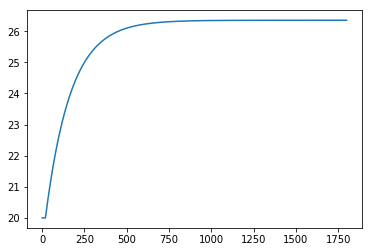

In [100]:
plt.plot(h.t[0:base_unit], fopdt(h.t[0:base_unit], K, tau, theta, y0)+20)

[7.937039293784351, 178.12547158437934, 21.036608803970914, 22.461818209595204]
[7.1536906324730705, 165.1448014291556, 20.926050477221434, 30.524285724070324]
[6.563112964813911, 149.81063296072156, 20.61981901347487, 37.68428564746316]
[6.506009951709675, 148.81426436927867, 20.3072471873931, 44.27761894615264]
[6.189974932654428, 141.02997469036322, 18.47722983838304, 50.795789460405004]
[6.413889462851305, 135.75806087229026, 23.42268878301546, 57.25958333680524]
[6.064173166391529, 135.39259360058972, 25.6235714302216, 63.85615394006349]
[5.727977588148545, 127.65326994342529, 25.390739043099863, 69.86076928329975]
[5.83587135055858, 194.00614209076102, 0.998937082346969, 75.69993886384873]
[5.052179674483506, 111.0114012113139, 26.346227181074287, 81.70148148521349]


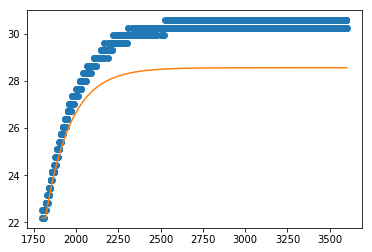

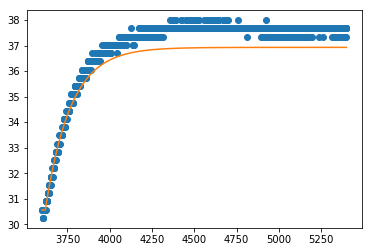

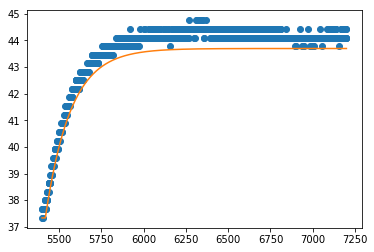

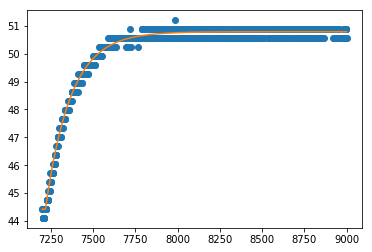

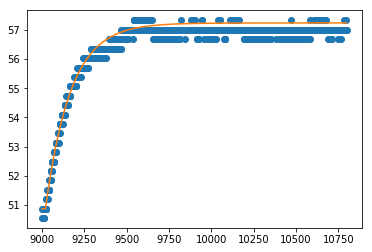

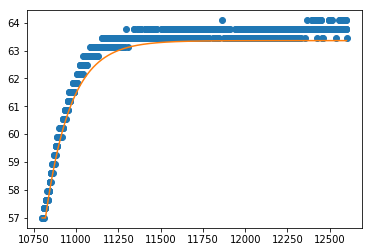

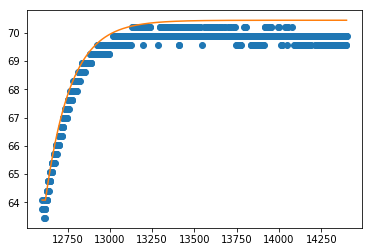

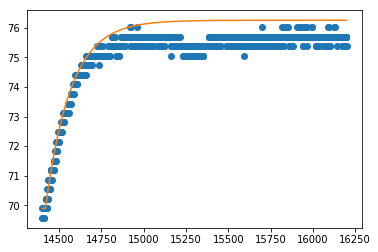

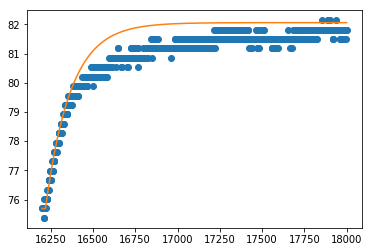

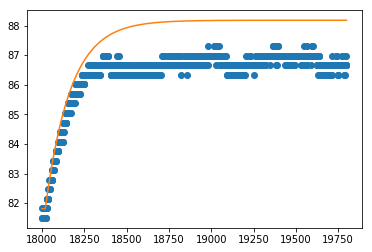

In [104]:
for span in range(1,spans):
    plt.figure()
    
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict('T1')[lower:upper], [2, 4, 100, 50])

    print([K, tau, theta, y0])
#     print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
    plt.plot(h.t[lower:upper], h.logdict('T1')[lower:upper], 'o')
    plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K_all, tau_all, theta_all, y0_all)+h.logdict('T1')[lower])

# Cohen Coon

In [3]:
#P controller

def cohen_coon(selection, var):
    Kp, τ, θ = var
    if selection == 'P':
        Kc = (1.03/Kp)*(τ/θ + 0.34)
        τI = 0
        τd = 0 
        return Kc, τI, τd

#PI controller
    if selection == 'PI':
        Kc = (0.9/Kp)*(τ/θ + 0.092)
        τI = (3.33*θ)*((τ + 0.092*θ)/(τ + 2.22*θ))
        τd = 0
        return Kc, τI, τd


#PD controller
    if selection == 'PD':
        Kc = (1.24/Kp)*(τ/θ + 0.129)
        τI = 0
        τd = 0.27*θ*((τ - 0.324*θ)/(τ + 0.129*θ))
        return Kc, τI, τd

#PID controller
    if selection == 'PID':
        Kc = (1.35/Kp)*(τ/θ + 0.185)
        τI = 2.25*θ*((τ + 0.185*θ)/(τ + 0.611*θ))
        τd = 0.37*θ*(τ/(τ + 0.185*θ))
        return Kc, τI, τd